<a href="https://colab.research.google.com/github/Puja-Kumari-909/Music-Recommendation-system/blob/master/Music_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet Information**

This dataset contains two files: triplet_file and song_data. The triplet_file contains the user_id, song_id and listen time. The song_data file contains song_id, title, released_by, artist_name and release release_year.

In [60]:
import pandas as pd
import numpy as np
import Recommender as Recommenders
import time
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from scipy.stats import skew, norm, probplot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [ ]:
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [ ]:
song_df_2 = pd.read_csv('song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [78]:
# combine both data
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
print(len(song_df_1), len(song_df_2))

2000000 1000000


In [79]:
song_df.shape
total_data=song_df

print("Number of datapoints:",total_data.shape[0])
print("Number of features:",total_data.shape[1])
print("Features are:",total_data.columns.values)

Number of datapoints: 2000000
Number of features: 7
Features are: ['user_id' 'song_id' 'listen_count' 'title' 'release' 'artist_name' 'year']


In [65]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
 3   title         object
 4   release       object
 5   artist_name   object
 6   year          int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [66]:
total_data.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


In [68]:
total_data.columns=total_data.columns.str.rstrip()
total_data.columns=total_data.columns.str.lstrip()

In [70]:
total_data['listen_count'].value_counts()

1      1138433
2       313043
3       142933
5        93136
4        82569
        ...   
255          1
302          1
330          1
431          1
260          1
Name: listen_count, Length: 295, dtype: int64

In [74]:
total_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [73]:
#checking for nan values if any
print(total_data.columns.isnull().sum()) 

0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


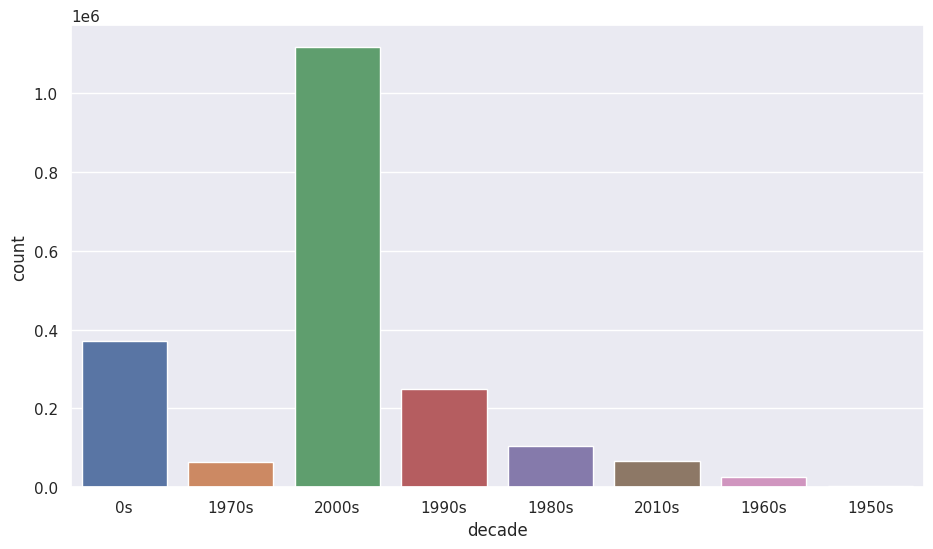

In [75]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade
total_data['decade'] = total_data['year'].apply(get_decade)
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(total_data['decade'])

Text(0.5, 1.02, 'scatter plot of Source Port and Destination Port')

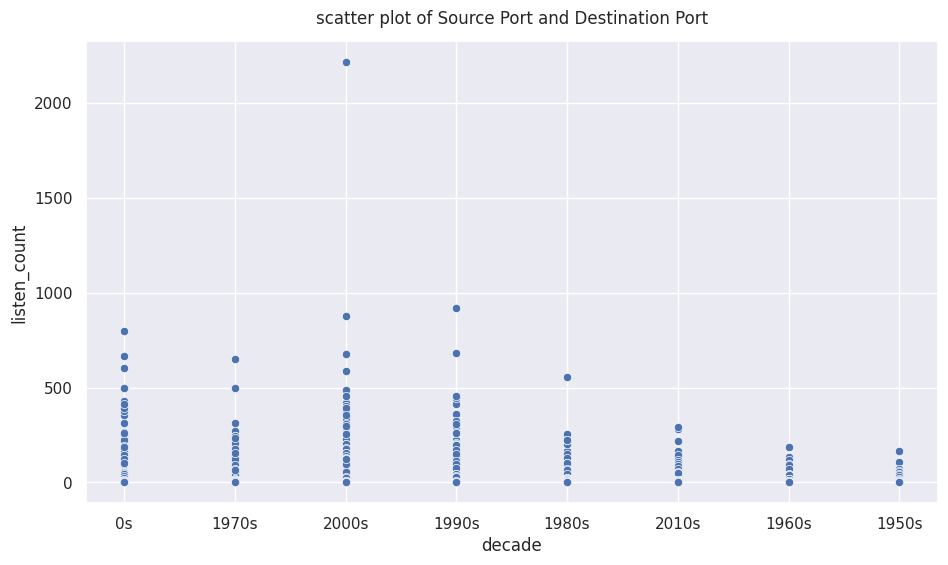

In [76]:
sns.scatterplot(x='decade',y='listen_count',data=total_data)
plt.title("scatter plot of Source Port and Destination Port",y=1.02)

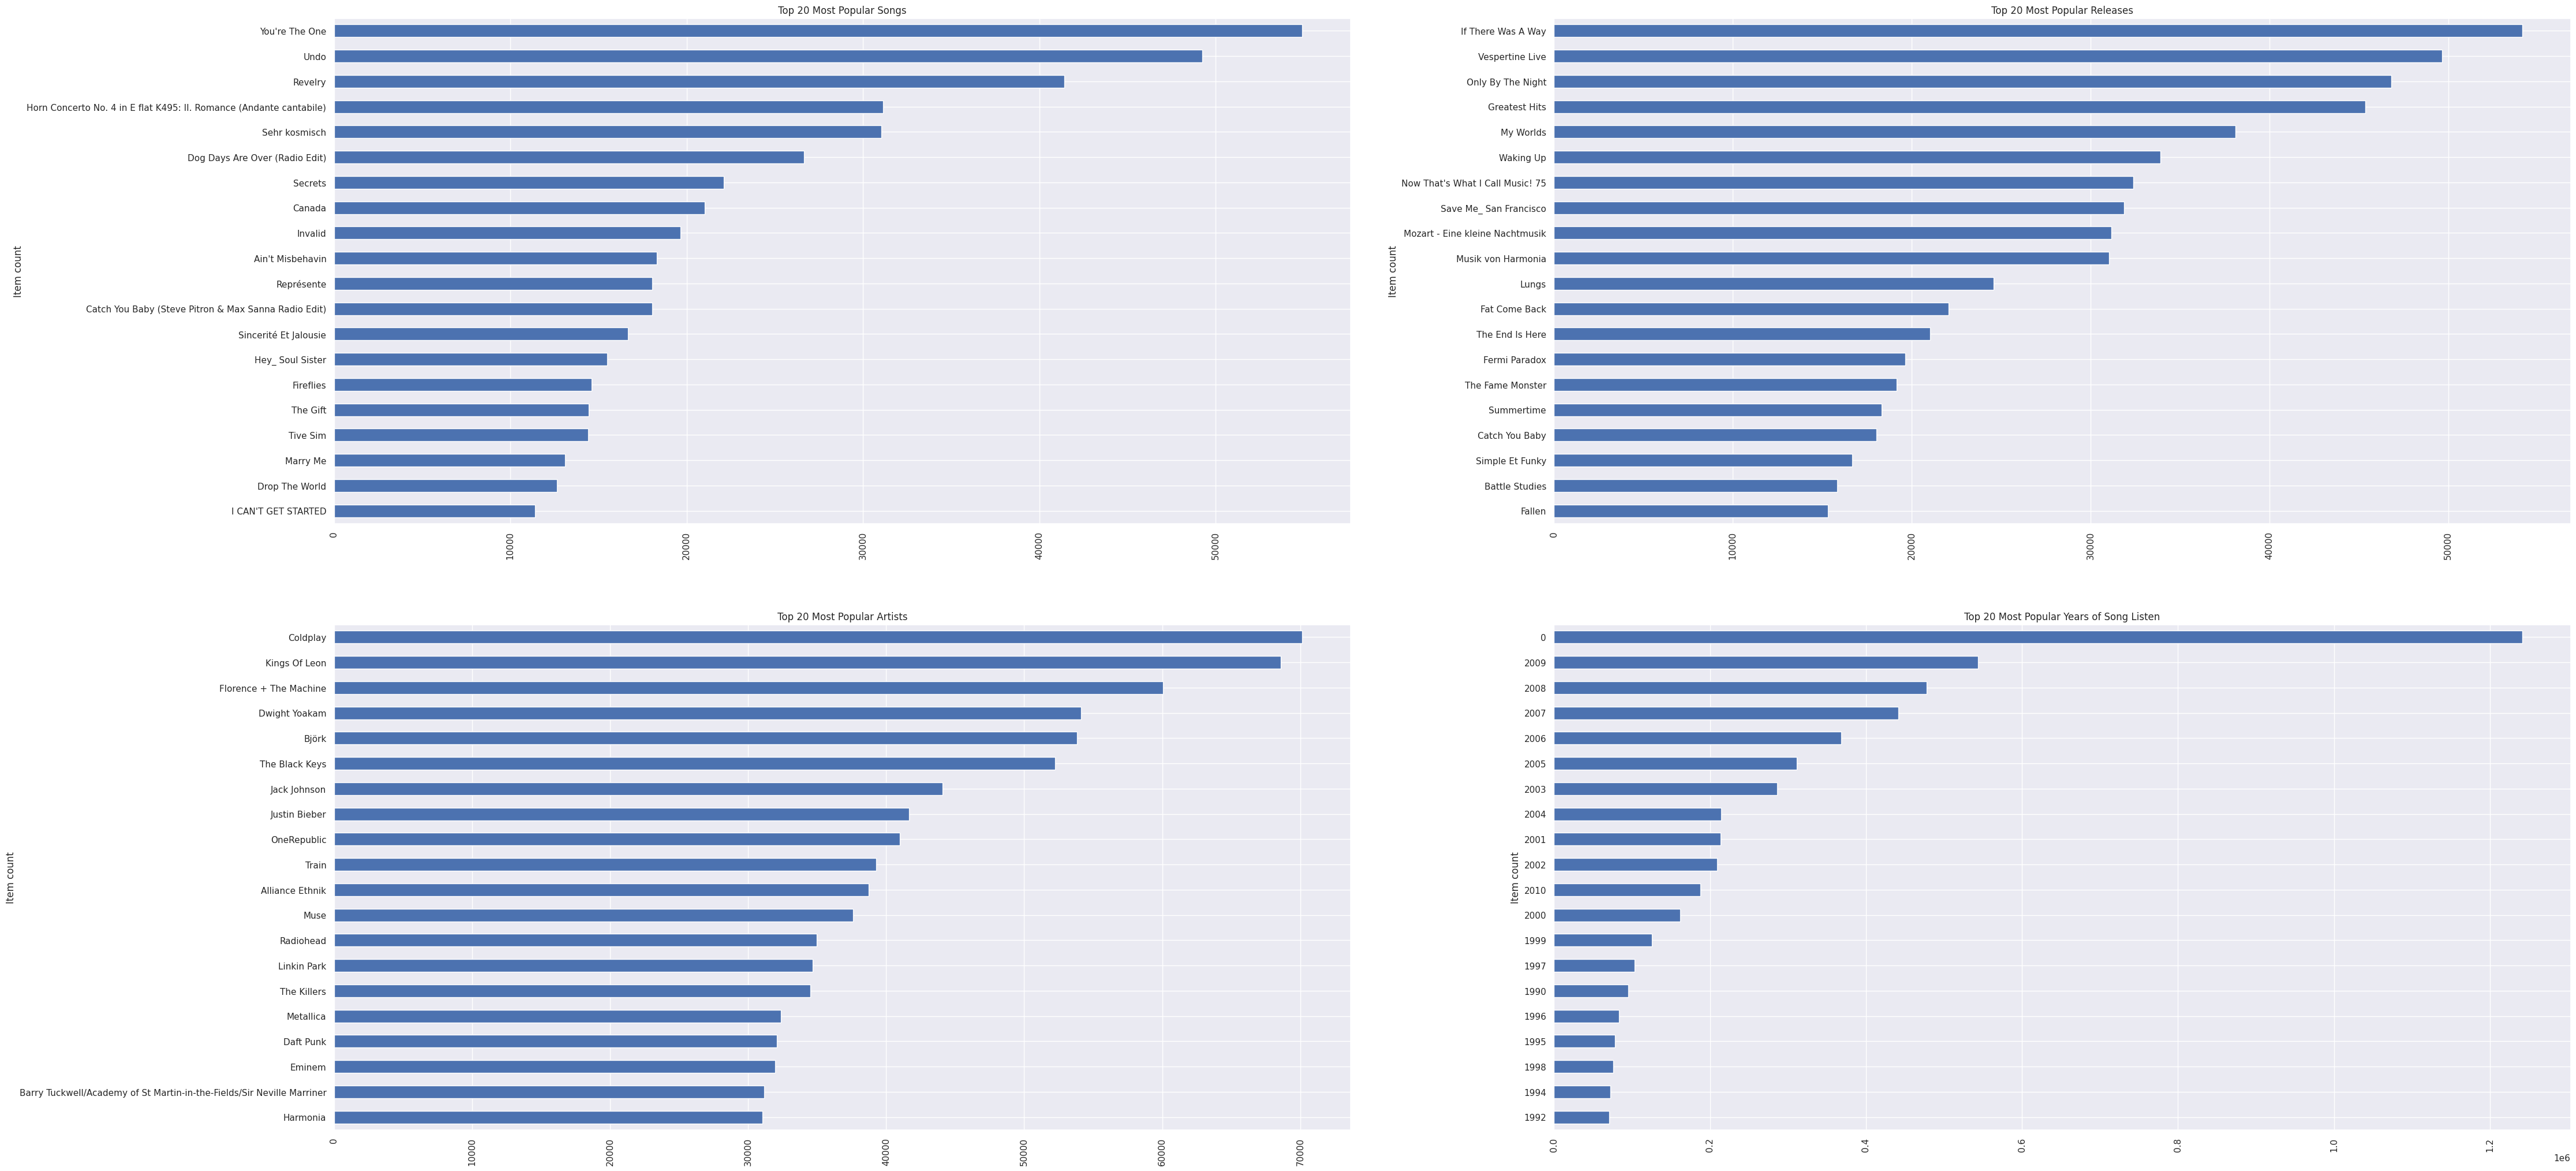

In [80]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
popular_songs = song_df[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a2 = fig.add_subplot(222)
popular_release = song_df[['release','listen_count']].groupby('release').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f2 = popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a3 = fig.add_subplot(223)
popular_artist = song_df[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_artist.plot(kind='barh', title='Top 20 Most Popular Artists', legend=False, ax=a3)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a4 = fig.add_subplot(224)
popular_year = song_df[['year','listen_count']].groupby('year').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_year.plot(kind='barh', title='Top 20 Most Popular Years of Song Listen', legend=False, ax=a4)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

plt.show()

# Data Preprocessing

In [81]:
# creating new feature combining title and artist name
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [82]:
# taking top 10k samples for quick results
song_df = song_df.head(10000)

In [84]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [85]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


#Popularity Recommendation Engine

In [86]:
pr = Recommenders.popularity_recommender_py()

In [87]:
pr.create(song_df, 'user_id', 'song')

In [88]:
# display the top 10 popular songs
pr.recommend(song_df['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [89]:
pr.recommend(song_df['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


#Item Similarity Recommendation

In [90]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(song_df, 'user_id', 'song')

In [91]:
user_items = ir.get_user_items(song_df['user_id'][5])


In [92]:
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [93]:
# give song recommendation for that user
ir.recommend(song_df['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Elsewhere - Dave Grusin,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oil And Water - Incubus,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,10


In [94]:
# give related songs based on the words
ir.get_similar_items(['Oliver James - Fleet Foxes'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :46


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,1.000000,1
1,,Your Protector - Fleet Foxes,1.000000,2
2,,Tiger Mountain Peasant Song - Fleet Foxes,1.000000,3
3,,Sun It Rises - Fleet Foxes,1.000000,4
4,,He Doesn't Know Why - Fleet Foxes,0.666667,5
5,,There She Goes Again - Velvet Underground & Nico,0.500000,6
6,,Wave of Mutilation (UK Surf Version) - Pixies,0.500000,7
7,,Drops In The River - Fleet Foxes,0.500000,8
8,,Oh! Sweet Nuthin' (LP Version) - The Velvet Un...,0.500000,9
9,,Debaser - Pixies,0.500000,10


### **Get top recommendations for a user based on past listened songs by that user** ###

In [95]:
user_songs = ir.get_user_items(song_df['user_id'][10])
print(user_songs)

['The Cove - Jack Johnson', 'Entre Dos Aguas - Paco De Lucia', 'Stronger - Kanye West', 'Constellations - Jack Johnson', 'Learn To Fly - Foo Fighters', "Apuesta Por El Rock 'N' Roll - Héroes del Silencio", 'Paper Gangsta - Lady GaGa', 'Stacked Actors - Foo Fighters', 'Sehr kosmisch - Harmonia', "Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini", 'Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams', "I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy", "Love Shack - The B-52's", 'Clarity - John Mayer', "I?'m A Steady Rollin? Man - Robert Johnson", 'The Old Saloon - The Lonely Island', 'Behind The Sea [Live In Chicago] - Panic At The Disco', 'Champion - Kanye West', 'Breakout - Foo Fighters', 'Ragged Wood - Fleet Foxes', 'Mykonos - Fleet Foxes', 'Country Road - Jack Johnson / Paula Fuga', 'Oh No - Andrew Bird', 'Love Song For No One - John Mayer', 'Jewels And Gold - Angus & Julia Stone', 'Warning - Inc

In [96]:
cooccurence_matrix = ir.construct_cooccurence_matrix(user_songs , song_df['song'])
print(cooccurence_matrix)

[[1.         0.5        0.14285714 ... 0.         0.         0.        ]
 [0.5        1.         0.125      ... 0.         0.         0.        ]
 [0.14285714 0.125      1.         ... 0.         0.         0.        ]
 ...
 [0.33333333 0.25       0.11111111 ... 0.         0.         0.        ]
 [0.5        0.33333333 0.125      ... 0.         0.         0.        ]
 [0.33333333 0.25       0.11111111 ... 0.         0.         0.        ]]


In [97]:
ir.generate_top_recommendations(song_df['user_id'][10], cooccurence_matrix, song_df['song'], user_songs)

Non zero values in cooccurence_matrix :26029


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,10


In [98]:
user1_songs = ir.get_user_items(song_df['user_id'][1])
user2_songs = ir.get_user_items(song_df['user_id'][600])
user3_songs = ir.get_user_items(song_df['user_id'][900])
user4_songs = ir.get_user_items(song_df['user_id'][1500])
user5_songs = ir.get_user_items(song_df['user_id'][1100])

In [99]:
cooccurence_matrix1 = ir.construct_cooccurence_matrix(user1_songs , song_df['song'])
cooccurence_matrix2 = ir.construct_cooccurence_matrix(user2_songs , song_df['song'])
cooccurence_matrix3 = ir.construct_cooccurence_matrix(user3_songs , song_df['song'])
cooccurence_matrix4 = ir.construct_cooccurence_matrix(user4_songs , song_df['song'])
cooccurence_matrix5 = ir.construct_cooccurence_matrix(user5_songs , song_df['song'])

In [100]:
recommendation1 = ir.generate_top_recommendations(song_df['user_id'][1], cooccurence_matrix1, song_df['song'], user1_songs)
recommendation2 = ir.generate_top_recommendations(song_df['user_id'][200], cooccurence_matrix2, song_df['song'], user2_songs)
recommendation3 = ir.generate_top_recommendations(song_df['user_id'][900], cooccurence_matrix3, song_df['song'], user3_songs)
recommendation4 = ir.generate_top_recommendations(song_df['user_id'][400], cooccurence_matrix4, song_df['song'], user4_songs)
recommendation5 = ir.generate_top_recommendations(song_df['user_id'][500], cooccurence_matrix5, song_df['song'], user5_songs)
print('\n' + "For the 1st user recommended song are: ")
print(recommendation1['song'])
print('\n' + "For the 2nd user recommended song are: ")
print(recommendation2['song'])
print('\n' + "For the 3rd user recommended song are:")
print(recommendation3['song'])
print('\n' + "For the 4th user recommended song are:")
print(recommendation4['song'])
print('\n' + "For the 5th user recommended song are:")
print(recommendation5['song'])

Non zero values in cooccurence_matrix :26029
Non zero values in cooccurence_matrix :530831
Non zero values in cooccurence_matrix :1068
Non zero values in cooccurence_matrix :41607
Non zero values in cooccurence_matrix :3416

For the 1st user recommended song are: 
0                   Oliver James - Fleet Foxes
1                   Quiet Houses - Fleet Foxes
2                 Your Protector - Fleet Foxes
3    Tiger Mountain Peasant Song - Fleet Foxes
4                   Sun It Rises - Fleet Foxes
5                   Oliver James - Fleet Foxes
6                   Quiet Houses - Fleet Foxes
7                 Your Protector - Fleet Foxes
8    Tiger Mountain Peasant Song - Fleet Foxes
9                   Sun It Rises - Fleet Foxes
Name: song, dtype: object

For the 2nd user recommended song are: 
0          Shake A Fist - Hot Chip
1             La Rock 01 - Vitalic
2     Indra - Thievery Corporation
3             Needy Girl - Chromeo
4          Shake A Fist - Hot Chip
5             La Rock 0